총 계정 수: 49
총 IP 수: 1809
리워드 총 수: 7406

상위 IP별 계정 수 및 리워드 수 요약:
                 unique_accounts  total_rewards  avg_reward_amount
ip                                                                
177.237.144.102                2             32          35.403880
208.29.138.40                  2             12          29.128735
53.162.59.233                  2              7          19.445236
54.132.225.149                 2              8           6.420634
1.144.215.5                    1              5           7.090898
1.146.59.99                    1              8          30.443103
1.18.159.141                   1              1          10.000000
1.180.159.59                   1             19          13.848610
1.190.91.212                   1              1          20.000000
1.226.0.43                     1              3           7.184857


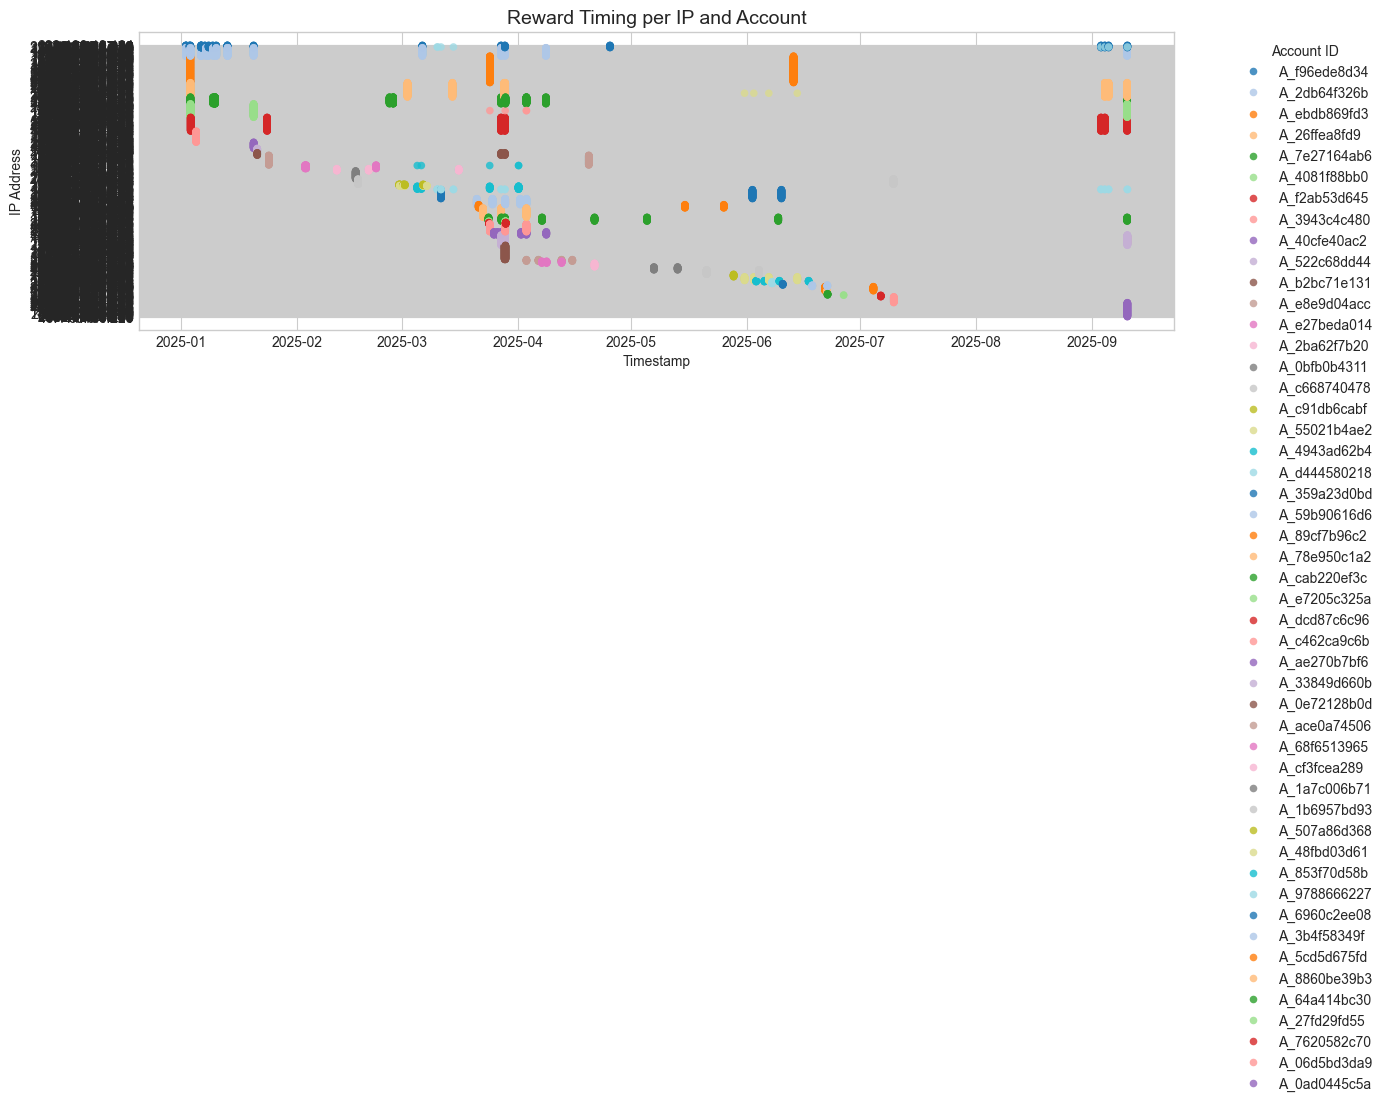

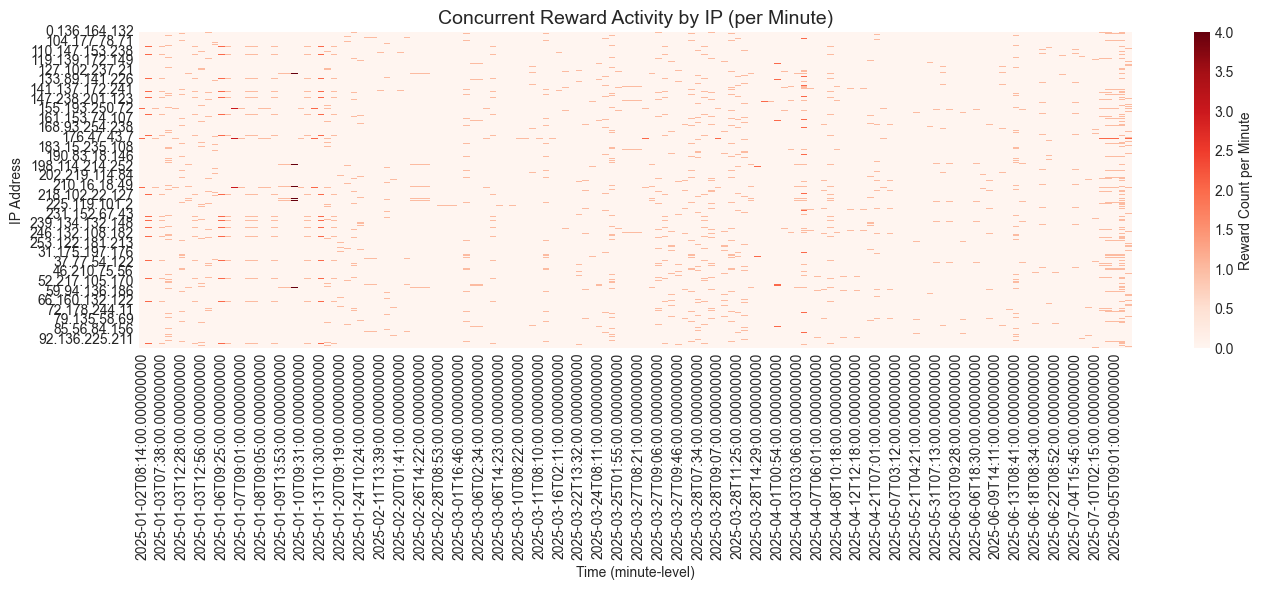


🚨 동시 리워드 수령이 비정상적으로 높은 IP 목록 (±2σ 초과):
- 0.229.4.233 (계정 수: 1)
- 1.180.159.59 (계정 수: 1)
- 102.195.228.45 (계정 수: 1)
- 102.25.8.180 (계정 수: 1)
- 106.223.116.72 (계정 수: 1)
- 108.253.123.156 (계정 수: 1)
- 109.228.31.141 (계정 수: 1)
- 11.205.181.22 (계정 수: 1)
- 11.224.87.99 (계정 수: 1)
- 110.53.24.135 (계정 수: 1)
- 111.190.102.170 (계정 수: 1)
- 113.194.201.51 (계정 수: 1)
- 113.40.37.167 (계정 수: 1)
- 114.132.217.174 (계정 수: 1)
- 116.166.168.142 (계정 수: 1)
- 117.122.91.248 (계정 수: 1)
- 118.195.18.219 (계정 수: 1)
- 119.90.23.239 (계정 수: 1)
- 12.98.249.229 (계정 수: 1)
- 120.144.192.23 (계정 수: 1)
- 120.42.84.106 (계정 수: 1)
- 122.145.255.211 (계정 수: 1)
- 124.101.89.108 (계정 수: 1)
- 126.191.244.194 (계정 수: 1)
- 128.39.255.110 (계정 수: 1)
- 129.11.137.108 (계정 수: 1)
- 130.32.45.196 (계정 수: 1)
- 131.181.227.136 (계정 수: 1)
- 132.12.132.97 (계정 수: 1)
- 133.128.212.204 (계정 수: 1)
- 133.155.129.112 (계정 수: 1)
- 134.144.47.139 (계정 수: 1)
- 135.114.102.23 (계정 수: 1)
- 135.41.136.204 (계정 수: 1)
- 136.245.47.143 (계정 수: 1)
- 138.22.136.116 (계정 수:

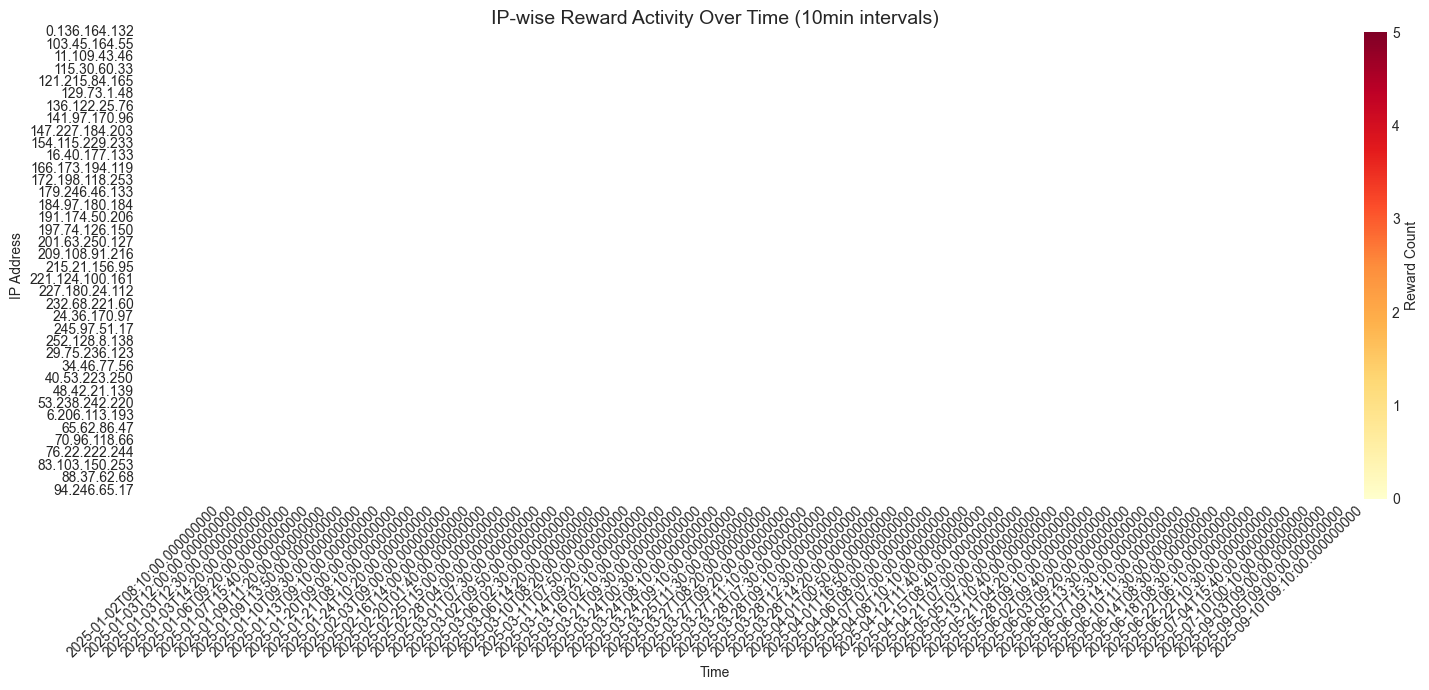

In [4]:
# ============================================
# 🔹 Step 0. Environment setup
# ============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams["figure.figsize"] = (14, 6)
plt.style.use("seaborn-v0_8-whitegrid")

file_path = "problem_data_final.xlsx"

# ============================================
# 🔹 Step 1. Load data
# ============================================
reward = pd.read_excel(file_path, sheet_name="Reward")
ip_df = pd.read_excel(file_path, sheet_name="IP")

# timestamp 변환
reward["ts"] = pd.to_datetime(reward["ts"])

# IP 정보 병합
reward_ip = reward.merge(ip_df, on="account_id", how="left")

# ============================================
# 🔹 Step 2. 데이터 요약
# ============================================
print("총 계정 수:", reward_ip["account_id"].nunique())
print("총 IP 수:", reward_ip["ip"].nunique())
print("리워드 총 수:", len(reward_ip))

ip_summary = (
    reward_ip.groupby("ip")
    .agg(
        unique_accounts=("account_id", "nunique"),
        total_rewards=("reward_amount", "count"),
        avg_reward_amount=("reward_amount", "mean")
    )
    .sort_values("unique_accounts", ascending=False)
)
print("\n상위 IP별 계정 수 및 리워드 수 요약:")
print(ip_summary.head(10))

# ============================================
# 🔹 Step 3. 전체 IP-계정 리워드 시각화 (Time vs IP vs Account)
# ============================================
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=reward_ip,
    x="ts",
    y="ip",
    hue="account_id",
    palette="tab20",
    s=30,
    alpha=0.8,
    linewidth=0
)

plt.title("Reward Timing per IP and Account", fontsize=14)
plt.xlabel("Timestamp")
plt.ylabel("IP Address")
plt.legend(title="Account ID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# ============================================
# 🔹 Step 4. IP별 리워드 동시성 히트맵
# ============================================
# 분 단위로 그룹화해 동시 리워드 빈도 계산
reward_ip["minute"] = reward_ip["ts"].dt.floor("min")
ip_time = (
    reward_ip.groupby(["ip", "minute"])
    .agg(reward_count=("account_id", "count"))
    .reset_index()
)

pivot_table = ip_time.pivot(index="ip", columns="minute", values="reward_count").fillna(0)

plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot_table,
    cmap="Reds",
    cbar_kws={"label": "Reward Count per Minute"}
)
plt.title("Concurrent Reward Activity by IP (per Minute)", fontsize=14)
plt.xlabel("Time (minute-level)")
plt.ylabel("IP Address")
plt.tight_layout()
plt.show()

# ============================================
# 🔹 Step 5. 이상 IP 탐색 (정상 범위 정의)
# ============================================
threshold = ip_time["reward_count"].mean() + 2 * ip_time["reward_count"].std()
suspicious_ips = ip_time[ip_time["reward_count"] > threshold]["ip"].unique()

print("\n🚨 동시 리워드 수령이 비정상적으로 높은 IP 목록 (±2σ 초과):")
for ip in suspicious_ips:
    count = ip_summary.loc[ip, "unique_accounts"]
    print(f"- {ip} (계정 수: {count})")

# ============================================
# 🔹 Step X. IP별 리워드 수령 빈도 (시간대별 시각화)
# ============================================
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt

# 시간대 단위(예: 10분)로 묶기 — 너무 세밀하면 노이즈가 많기 때문
reward_ip["time_bucket"] = reward_ip["ts"].dt.floor("10min")

# IP별 시간대별 리워드 횟수 계산
ip_time_freq = (
    reward_ip.groupby(["ip", "time_bucket"])
    .size()
    .reset_index(name="reward_count")
)

# 피벗 형태로 변환 (행: IP / 열: 시간대)
pivot_ip_time = ip_time_freq.pivot(index="ip", columns="time_bucket", values="reward_count").fillna(0)

# ============================================
# 🔹 Heatmap 시각화
# ============================================
plt.figure(figsize=(16, 7))
sns.heatmap(
    pivot_ip_time,
    cmap="YlOrRd",
    cbar_kws={"label": "Reward Count"},
    linewidths=0.1,
)

plt.title("IP-wise Reward Activity Over Time (10min intervals)", fontsize=14)
plt.xlabel("Time")
plt.ylabel("IP Address")

# x축을 시간 포맷으로 보기 좋게 변환
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



✅ 평균 리워드 간격 (초): 3641944.32
✅ 정상 범위 (±2σ): -3388642.34 ~ 10672530.98 초

✅ 평균 리워드 금액 표준편차: 22.9134
✅ 정상 범위 (±2σ): -54.8534 ~ 100.6802

예시 — 평균 간격이 짧은 IP 10개:
                  ip  mean_interval  std_interval  reward_count  reward_std
1708    85.78.240.15   18224.133178           NaN             2    0.001358
1710  86.167.110.191   18224.133178           NaN             2    0.001358
108    110.10.193.29   18224.133178           NaN             2    0.001358
1740     9.3.207.156   18224.133178           NaN             2    0.001358
111   110.176.94.250   18224.133178           NaN             2    0.001358
798    20.184.26.229   18224.133178           NaN             2    0.001358
868   209.238.25.211   18224.133178           NaN             2    0.001358
125   113.184.72.147   18224.133178           NaN             2    0.001358
715    190.83.18.146   18224.133178           NaN             2    0.001358
940   218.243.178.42   18224.133178           NaN             2    0.001358


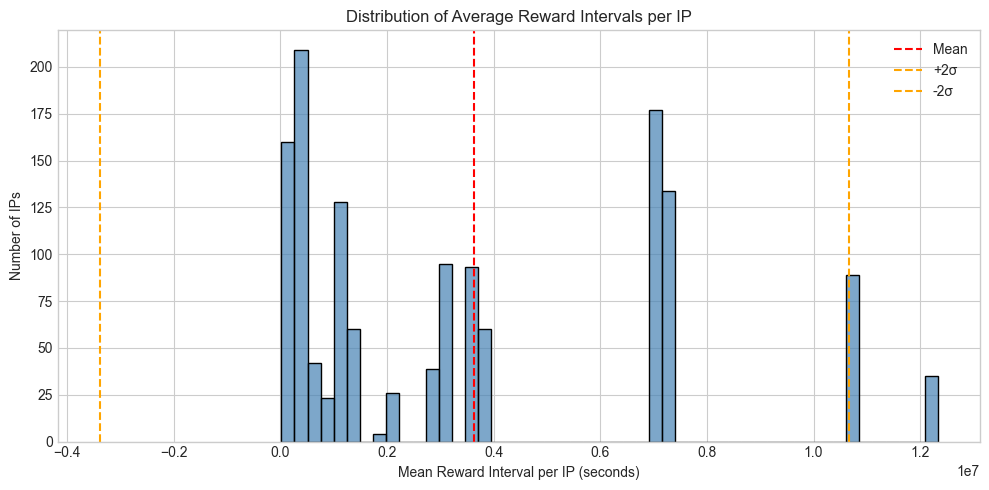

In [7]:
import numpy as np
import pandas as pd

# timestamp 기준 정렬
reward_ip_sorted = reward_ip.sort_values(["ip", "ts"])

# ① 동일 IP 내 연속 리워드 간 시간 간격(초 단위)
reward_ip_sorted["time_diff"] = (
    reward_ip_sorted.groupby("ip")["ts"].diff().dt.total_seconds()
)

# IP별 평균, 표준편차 계산
ip_stats = (
    reward_ip_sorted.groupby("ip")
    .agg(
        mean_interval=("time_diff", "mean"),
        std_interval=("time_diff", "std"),
        reward_count=("reward_amount", "count"),
        reward_std=("reward_amount", "std"),
    )
    .reset_index()
)

# 전체 평균 ± 2σ 구하기
mean_interval_mean = ip_stats["mean_interval"].mean()
mean_interval_std = ip_stats["mean_interval"].std()
reward_std_mean = ip_stats["reward_std"].mean()
reward_std_std = ip_stats["reward_std"].std()

print("✅ 평균 리워드 간격 (초):", round(mean_interval_mean, 2))
print("✅ 정상 범위 (±2σ):", 
      f"{round(mean_interval_mean - 2*mean_interval_std, 2)} ~ {round(mean_interval_mean + 2*mean_interval_std, 2)} 초")
print("\n✅ 평균 리워드 금액 표준편차:", round(reward_std_mean, 4))
print("✅ 정상 범위 (±2σ):", 
      f"{round(reward_std_mean - 2*reward_std_std, 4)} ~ {round(reward_std_mean + 2*reward_std_std, 4)}")

# 상위/하위 일부 샘플 확인
print("\n예시 — 평균 간격이 짧은 IP 10개:")
print(ip_stats.sort_values("mean_interval").head(10))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(ip_stats["mean_interval"].dropna(), bins=50, color="steelblue", alpha=0.7)
plt.axvline(mean_interval_mean, color="red", linestyle="--", label="Mean")
plt.axvline(mean_interval_mean + 2*mean_interval_std, color="orange", linestyle="--", label="+2σ")
plt.axvline(mean_interval_mean - 2*mean_interval_std, color="orange", linestyle="--", label="-2σ")
plt.xlabel("Mean Reward Interval per IP (seconds)")
plt.ylabel("Number of IPs")
plt.title("Distribution of Average Reward Intervals per IP")
plt.legend()
plt.tight_layout()
plt.show()


🚨 의심 IP 상위 10개 (다른 계정이 짧은 시간 간격으로 리워드 수령):
                  ip  suspect_events
608  177.237.144.102               6
3      0.249.180.193               0
4        0.48.59.245               0
5        1.144.215.5               0
6        1.146.59.99               0
7       1.18.159.141               0
8       1.180.159.59               0
9       1.190.91.212               0
10        1.226.0.43               0
11      1.251.36.201               0

🚨 다계정 짧은 간격 패턴 비율 상위 IP:
                  ip  total_rewards  suspect_events  suspect_ratio
608  177.237.144.102             32               6         0.1875
3      0.249.180.193              2               0         0.0000
4        0.48.59.245              2               0         0.0000
5        1.144.215.5              5               0         0.0000
6        1.146.59.99              8               0         0.0000
7       1.18.159.141              1               0         0.0000
8       1.180.159.59             19               0    

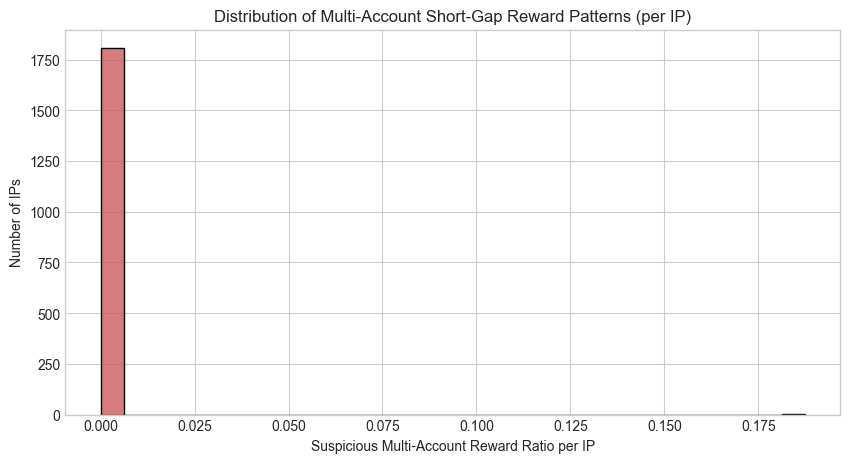

In [9]:
import pandas as pd
import numpy as np

# 정렬
reward_ip_sorted = reward_ip.sort_values(["ip", "ts"]).reset_index(drop=True)

# 동일 IP 내에서 바로 직전 보상과의 시간 차 계산
reward_ip_sorted["time_diff"] = reward_ip_sorted.groupby("ip")["ts"].diff().dt.total_seconds()

# 동일 IP에서 직전 계정이 같은지 여부
reward_ip_sorted["same_account_as_prev"] = (
    reward_ip_sorted.groupby("ip")["account_id"].shift() == reward_ip_sorted["account_id"]
)

# 다른 계정 + 시간 간격 짧음 조건 (예: 60초 이하)
threshold = 60  # 초 단위
reward_ip_sorted["is_multi_account_shortgap"] = (
    (~reward_ip_sorted["same_account_as_prev"]) & 
    (reward_ip_sorted["time_diff"].notnull()) &
    (reward_ip_sorted["time_diff"] <= threshold)
)

# IP별 다계정 의심 발생 횟수 집계
multi_suspect = (
    reward_ip_sorted.groupby("ip")["is_multi_account_shortgap"]
    .sum()
    .reset_index(name="suspect_events")
    .sort_values("suspect_events", ascending=False)
)

print("🚨 의심 IP 상위 10개 (다른 계정이 짧은 시간 간격으로 리워드 수령):")
print(multi_suspect.head(10))

# IP별 전체 리워드 횟수와 비교
ip_counts = reward_ip.groupby("ip")["reward_amount"].count().reset_index(name="total_rewards")
merged = pd.merge(ip_counts, multi_suspect, on="ip", how="left").fillna(0)
merged["suspect_ratio"] = merged["suspect_events"] / merged["total_rewards"]

print("\n🚨 다계정 짧은 간격 패턴 비율 상위 IP:")
print(merged.sort_values("suspect_ratio", ascending=False).head(10))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(merged["suspect_ratio"], bins=30, color="indianred", alpha=0.8)
plt.xlabel("Suspicious Multi-Account Reward Ratio per IP")
plt.ylabel("Number of IPs")
plt.title("Distribution of Multi-Account Short-Gap Reward Patterns (per IP)")
plt.show()



총 IP 수: 1809
평균 계정 수: 1.00
중앙값 계정 수: 1

상위 IP 10개 (연결 계정 수가 많은 순):
                   ip  unique_accounts
608   177.237.144.102                2
861     208.29.138.40                2
1437    53.162.59.233                2
1444   54.132.225.149                2
5         1.144.215.5                1
6         1.146.59.99                1
7        1.18.159.141                1
8        1.180.159.59                1
9        1.190.91.212                1
10         1.226.0.43                1

계정별 평균 리워드 간격(초):
평균: 2221997.81
중앙값: 1032869.76
표준편차: 3085517.50


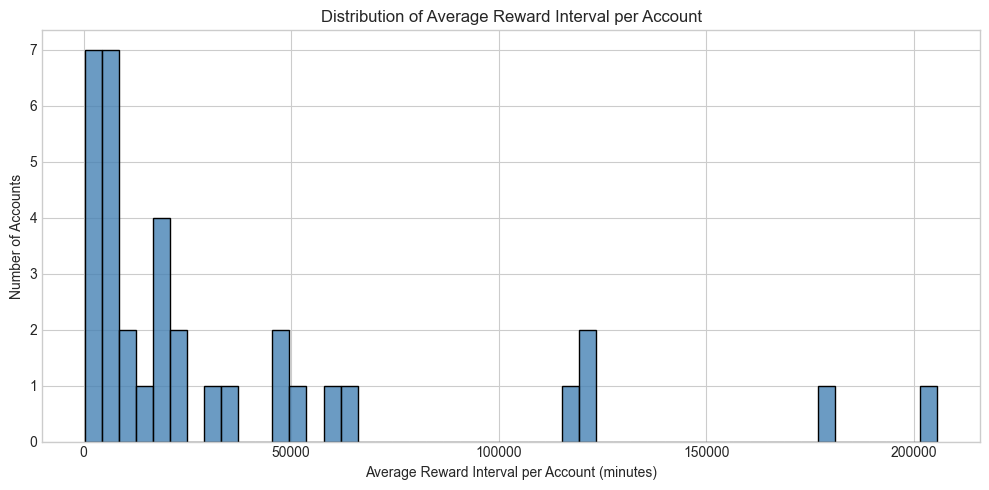

In [10]:
import pandas as pd
import numpy as np

# -------------------------------------------
# 1️⃣  IP별 계정 수 (한 IP당 몇 계정이 연결되어 있나?)
# -------------------------------------------
ip_account_count = reward_ip.groupby("ip")["account_id"].nunique().reset_index(name="unique_accounts")

print(f"총 IP 수: {len(ip_account_count)}")
print(f"평균 계정 수: {ip_account_count['unique_accounts'].mean():.2f}")
print(f"중앙값 계정 수: {ip_account_count['unique_accounts'].median():.0f}")
print("\n상위 IP 10개 (연결 계정 수가 많은 순):")
print(ip_account_count.sort_values("unique_accounts", ascending=False).head(10))

# -------------------------------------------
# 2️⃣  계정별 리워드 간 시간 간격
# -------------------------------------------
reward_sorted = reward.sort_values(["account_id", "ts"])
reward_sorted["time_diff"] = reward_sorted.groupby("account_id")["ts"].diff().dt.total_seconds()

# 계정별 평균 리워드 간격(초)
user_interval = reward_sorted.groupby("account_id")["time_diff"].mean().dropna().reset_index(name="mean_interval")

print("\n계정별 평균 리워드 간격(초):")
print(f"평균: {user_interval['mean_interval'].mean():.2f}")
print(f"중앙값: {user_interval['mean_interval'].median():.2f}")
print(f"표준편차: {user_interval['mean_interval'].std():.2f}")

# -------------------------------------------
# 3️⃣  히스토그램 시각화
# -------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(user_interval["mean_interval"]/60, bins=50, color="steelblue", alpha=0.8)
plt.xlabel("Average Reward Interval per Account (minutes)")
plt.ylabel("Number of Accounts")
plt.title("Distribution of Average Reward Interval per Account")
plt.tight_layout()
plt.show()


✅ 1 IP - 1 Account 사용자 리워드 간격 통계 (단위: 분)
평균 간격: 617.72 분 (10.30 시간)
중앙값 간격: 237.44 분 (3.96 시간)
표준편차: 1373.92 분 (22.90 시간)


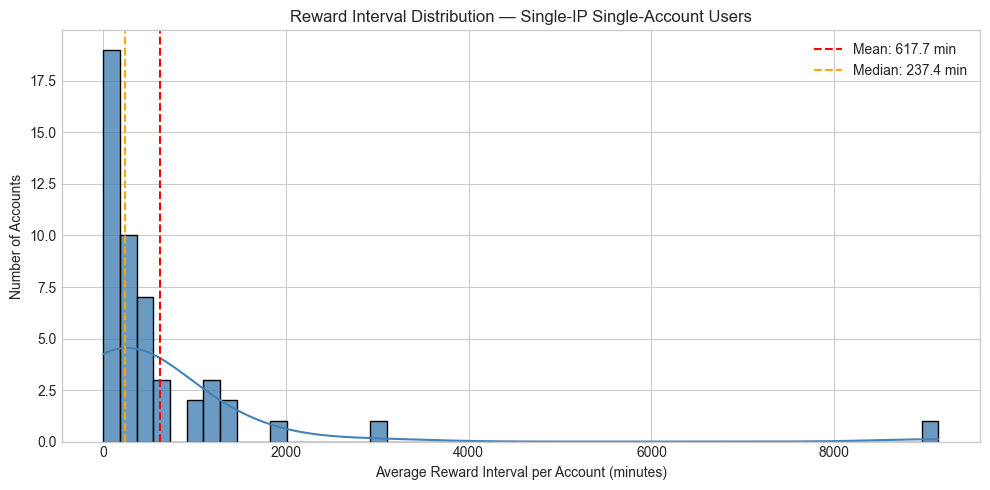

In [14]:
# ============================================
# 🔹 Step: 1 IP - 1 Account 사용자 리워드 간격 분석 + 시각화
# ============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1️⃣ IP당 계정 수 계산
ip_account_count = reward_ip.groupby("ip")["account_id"].nunique().reset_index(name="unique_accounts")

# 2️⃣ 1계정만 사용하는 IP만 필터
single_ip_list = ip_account_count[ip_account_count["unique_accounts"] == 1]["ip"]

# 3️⃣ 해당 IP의 리워드 데이터만 추출
single_user_rewards = reward_ip[reward_ip["ip"].isin(single_ip_list)]

# 4️⃣ 계정별 리워드 간격 계산
single_sorted = single_user_rewards.sort_values(["account_id", "ts"])
single_sorted["time_diff"] = single_sorted.groupby("account_id")["ts"].diff().dt.total_seconds()

# 5️⃣ 계정별 평균 리워드 간격 (초 → 분 변환)
single_interval = single_sorted.groupby("account_id")["time_diff"].mean().dropna().reset_index(name="mean_interval")
single_interval["mean_interval_min"] = single_interval["mean_interval"] / 60  # 초 → 분

# 6️⃣ 통계 계산
mean_val = single_interval["mean_interval_min"].mean()
median_val = single_interval["mean_interval_min"].median()
std_val = single_interval["mean_interval_min"].std()

print("✅ 1 IP - 1 Account 사용자 리워드 간격 통계 (단위: 분)")
print(f"평균 간격: {mean_val:.2f} 분 ({mean_val/60:.2f} 시간)")
print(f"중앙값 간격: {median_val:.2f} 분 ({median_val/60:.2f} 시간)")
print(f"표준편차: {std_val:.2f} 분 ({std_val/60:.2f} 시간)")

# 7️⃣ 시각화
plt.figure(figsize=(10,5))
sns.histplot(single_interval["mean_interval_min"], bins=50, kde=True, color="steelblue", alpha=0.8)
plt.xlabel("Average Reward Interval per Account (minutes)")
plt.ylabel("Number of Accounts")
plt.title("Reward Interval Distribution — Single-IP Single-Account Users")

# 통계선 표시
plt.axvline(mean_val, color="red", linestyle="--", label=f"Mean: {mean_val:.1f} min")
plt.axvline(median_val, color="orange", linestyle="--", label=f"Median: {median_val:.1f} min")

plt.legend()
plt.tight_layout()
plt.show()


✅ 다계정 IP 사용자 리워드 간격 통계 (단위: 분)
평균 간격: 39084.77 분 (651.41 시간)
중앙값 간격: 15416.81 분 (256.95 시간)
표준편차: 58891.99 분 (981.53 시간)


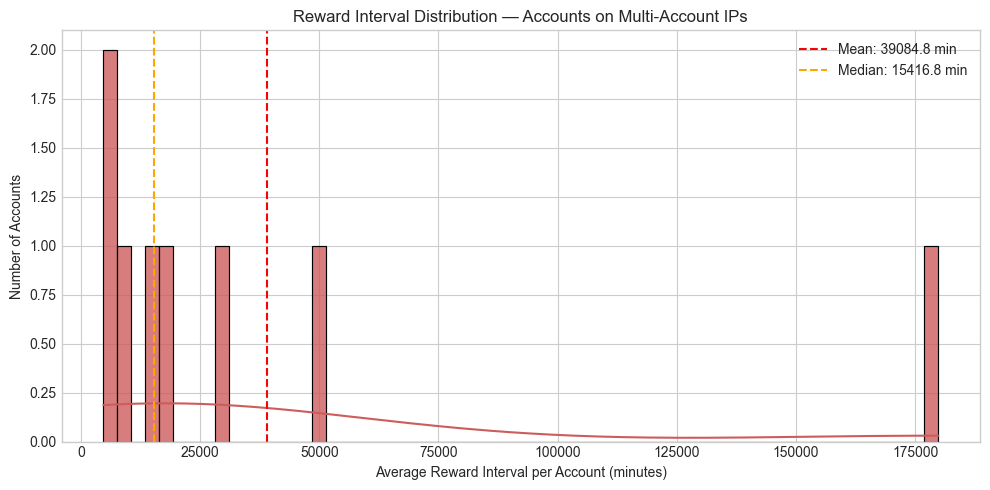

In [15]:
# ============================================
# 🔹 다계정 IP 사용자 리워드 수령 간격 분석 + 시각화
# ============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1️⃣ 데이터 로드
file_path = "problem_data_final.xlsx"
reward = pd.read_excel(file_path, sheet_name="Reward")
ip_df = pd.read_excel(file_path, sheet_name="IP")

# 2️⃣ 병합 및 전처리
reward["ts"] = pd.to_datetime(reward["ts"])
reward_ip = reward.merge(ip_df, on="account_id", how="left")

# 3️⃣ IP별 계정 수 계산 → 다계정 IP만 선택
ip_account_count = reward_ip.groupby("ip")["account_id"].nunique().reset_index(name="unique_accounts")
multi_ip_list = ip_account_count[ip_account_count["unique_accounts"] >= 2]["ip"]   # 2개 이상 계정 보유한 IP만
multi_ip_rewards = reward_ip[reward_ip["ip"].isin(multi_ip_list)]

# 4️⃣ 다계정 IP에 속한 각 계정의 리워드 간격 계산
multi_ip_rewards_sorted = multi_ip_rewards.sort_values(["account_id", "ts"])
multi_ip_rewards_sorted["time_diff"] = multi_ip_rewards_sorted.groupby("account_id")["ts"].diff().dt.total_seconds()

# 각 계정의 평균 리워드 간격(초) 계산 → 분으로 변환
account_intervals = (
    multi_ip_rewards_sorted.groupby("account_id")["time_diff"]
    .mean()
    .dropna()
    .reset_index(name="mean_interval_sec")
)
account_intervals["mean_interval_min"] = account_intervals["mean_interval_sec"] / 60

# 5️⃣ 통계값 계산
mean_val = account_intervals["mean_interval_min"].mean()
median_val = account_intervals["mean_interval_min"].median()
std_val = account_intervals["mean_interval_min"].std()

print("✅ 다계정 IP 사용자 리워드 간격 통계 (단위: 분)")
print(f"평균 간격: {mean_val:.2f} 분 ({mean_val/60:.2f} 시간)")
print(f"중앙값 간격: {median_val:.2f} 분 ({median_val/60:.2f} 시간)")
print(f"표준편차: {std_val:.2f} 분 ({std_val/60:.2f} 시간)")

# 6️⃣ 시각화
plt.figure(figsize=(10,5))
sns.histplot(account_intervals["mean_interval_min"], bins=60, kde=True, color="indianred", alpha=0.8)
plt.xlabel("Average Reward Interval per Account (minutes)")
plt.ylabel("Number of Accounts")
plt.title("Reward Interval Distribution — Accounts on Multi-Account IPs")
plt.axvline(mean_val, color="red", linestyle="--", label=f"Mean: {mean_val:.1f} min")
plt.axvline(median_val, color="orange", linestyle="--", label=f"Median: {median_val:.1f} min")
plt.legend()
plt.tight_layout()
plt.show()


✅ 다계정 IP 기준 (IP-level) 리워드 간격 통계 (분 단위)
평균: 29006.01 분 (483.43 시간)
중앙값: 22205.89 분 (370.10 시간)
표준편차: 22885.79 분 (381.43 시간)


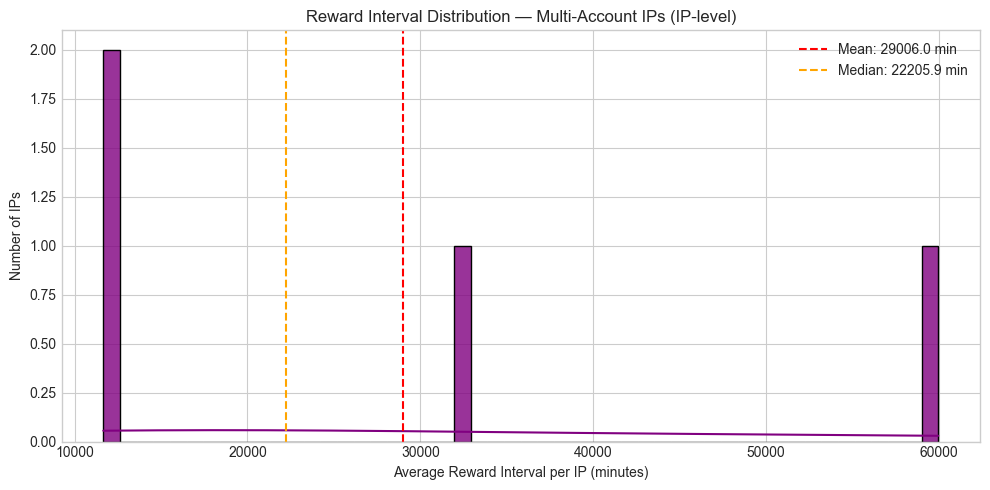

In [16]:
# ============================================
# 🔹 IP 단위 리워드 간격 계산 (교차 계정 포함)
# ============================================
reward_ip_sorted = reward_ip.sort_values(["ip", "ts"])
reward_ip_sorted["time_diff"] = reward_ip_sorted.groupby("ip")["ts"].diff().dt.total_seconds() / 60  # 분 단위

# 다계정 IP만 추출
ip_account_count = reward_ip.groupby("ip")["account_id"].nunique().reset_index(name="unique_accounts")
multi_ip_list = ip_account_count[ip_account_count["unique_accounts"] >= 2]["ip"]
multi_ip_sorted = reward_ip_sorted[reward_ip_sorted["ip"].isin(multi_ip_list)]

# IP별 평균 리워드 간격 계산
ip_interval = (
    multi_ip_sorted.groupby("ip")["time_diff"]
    .mean()
    .dropna()
    .reset_index(name="mean_interval_min")
)

# 통계 출력
mean_val = ip_interval["mean_interval_min"].mean()
median_val = ip_interval["mean_interval_min"].median()
std_val = ip_interval["mean_interval_min"].std()

print("✅ 다계정 IP 기준 (IP-level) 리워드 간격 통계 (분 단위)")
print(f"평균: {mean_val:.2f} 분 ({mean_val/60:.2f} 시간)")
print(f"중앙값: {median_val:.2f} 분 ({median_val/60:.2f} 시간)")
print(f"표준편차: {std_val:.2f} 분 ({std_val/60:.2f} 시간)")

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(ip_interval["mean_interval_min"], bins=50, kde=True, color="purple", alpha=0.8)
plt.axvline(mean_val, color="red", linestyle="--", label=f"Mean: {mean_val:.1f} min")
plt.axvline(median_val, color="orange", linestyle="--", label=f"Median: {median_val:.1f} min")
plt.xlabel("Average Reward Interval per IP (minutes)")
plt.ylabel("Number of IPs")
plt.title("Reward Interval Distribution — Multi-Account IPs (IP-level)")
plt.legend()
plt.tight_layout()
plt.show()
